# Financial Planning with APIs and Simulations

This App is broken down into two planning strategies:

Part 1: A financial planner for emergencies. The users will be able to use this tool to visualize their current savings. The users can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

In [1]:
# Import the required libraries and dependencies
import os
import requests as req
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

Python-dotenv could not parse statement starting at line 6


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library.

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = req.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3))

{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 18946400,
         "total_supply": 18946400,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 38568.0,
               "volume_24h": 17054095604,
               "market_cap": 729912142458,
               "percentage_change_1h": -0.268807202084769,
               "percentage_change_24h": 0.499758964726193,
               "percentage_change_7d": 4.26841033634362,
               "percent_change_1h": -0.268807202084769,
               "percent_change_24h": 0.499758964726193,
               "percent_change_7d": 4.26841033634362
            }
         },
         "last_updated": 1643767983
      }
   },
   "metadata": {
      "timestamp": 1643767983,
      "num_cryptocurrencies": 3105,
      "error": null
   }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = req.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3))

{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 119408111,
         "total_supply": 119408111,
         "max_supply": 0,
         "quotes": {
            "USD": {
               "price": 2759.08,
               "volume_24h": 12843964396,
               "market_cap": 329405137195,
               "percentage_change_1h": -0.596253666591435,
               "percentage_change_24h": 2.53921524465985,
               "percentage_change_7d": 11.9203441152002,
               "percent_change_1h": -0.596253666591435,
               "percent_change_24h": 2.53921524465985,
               "percent_change_7d": 11.9203441152002
            }
         },
         "last_updated": 1643768064
      }
   },
   "metadata": {
      "timestamp": 1643768064,
      "num_cryptocurrencies": 3105,
      "error": null
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current BTC price in USD is ${btc_price:.2f}")

The current BTC price in USD is $38568.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current ETH price in USD is ${eth_price:.2f}")

The current ETH price in USD is $2759.08


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"You have {btc_coins} BTC in your Portfolio.\nYour current BTC holding value in USD is ${btc_value:.2f}")

You have 1.2 BTC in your Portfolio.
Your current BTC holding value in USD is $46281.60


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"You have {eth_coins} ETH in your Portfolio.\nYour current ETH holding value in USD is ${eth_value:.2f}")

You have 5.3 ETH in your Portfolio.
Your current ETH holding value in USD is $14623.12


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"You have {btc_coins + eth_coins} total Crypto Coins in your Portfolio.\nYour current Total Crypto holding's value in USD is ${total_crypto_wallet:.2f}")

You have 6.5 total Crypto Coins in your Portfolio.
Your current Total Crypto holding's value in USD is $60904.72


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: Create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    os.getenv("ALPACA_API_KEY"),
    os.getenv("ALPACA_SECRET_KEY"),
    api_version='v2'
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
yesterday = pd.Timestamp("2022-01-25", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
protfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = yesterday,
    end = yesterday
).df

# Review the first 5 rows of the Alpaca DataFrame
protfolio_df.head()


AGG                                   SPY  \
                             open   high     low close   volume    open   
time                                                                      
2022-01-25 00:00:00-05:00  112.18  112.3  111.96   112  9392367  433.06   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-25 00:00:00-05:00  439.72  364.68  434.51  148023735

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(protfolio_df['AGG']['close'])

# Print the AGG closing price
print(f"Yesterday's closing price for AGG was ${agg_close_price:.2f}")

Yesterday's closing price for AGG was $112.00


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(protfolio_df['SPY']['close'])

# Print the SPY closing price
print(f"Yesterday's closing price for SPY was ${spy_close_price:.2f}")

Yesterday's closing price for SPY was $434.51


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Yesterday's closing value for the AGG holdings was ${agg_value:.2f}")

Yesterday's closing value for the AGG holdings was $22400.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"Yesterday's closing value for the SPY holdings was ${spy_value:.2f}")

Yesterday's closing value for the SPY holdings was $47796.10


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value for the Stocks and Bonds holdings at yesterday's close was ${total_stocks_bonds:.2f}")

The total value for the Stocks and Bonds holdings at yesterday's close was $70196.10


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The total value for the Portfolio holdings including Crypto,\nStocks and Bonds, at yesterday's close was ${total_portfolio:.2f}")

The total value for the Portfolio holdings including Crypto,
Stocks and Bonds, at yesterday's close was $131100.82


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan.

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data

[60904.724, 70196.1]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stocks/bonds']
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,60904.724
stocks/bonds,70196.100


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition Crypto | Stocks/Bonds'}, ylabel='amount'>

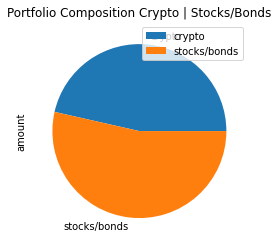

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition Crypto | Stocks/Bonds')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! Your portfolio balance of ${total_portfolio:.2f} is \nmore than the required ${emergency_fund_value:.2f} to get you through a tough time.")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations on achieving this goal! Your portfolio balance of ${total_portfolio:.2f}\n equals the required ${emergency_fund_value:.2f}\nto get you through a tough time. This is a major milestone in your financial road to success")
else:
    print(f"Your portfolio balance is ${total_portfolio:.2f}. You need ${emergency_fund_value - total_portfolio:.2f}\nto get to reach your emergency fund value goal of ${emergency_fund_value:.2f}")

Congratulations! Your portfolio balance of $131100.82 is 
more than the required $36000.00 to get you through a tough time.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio.

#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-01-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-25", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
financial_planner_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(financial_planner_df.head())
display(financial_planner_df.tail())

AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-25 00:00:00-05:00  106.64  106.700  106.560  106.6750   3157633.0   
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   

                              SPY                                        
                             open    high       low     close    volume  
time                                                                     
2019-01-25 00:00:00-05:00  265.61  266.70  263.6595  265.7000  78094541  
2019-01-28 00:00:00-05:00  263.39  263.82  261.7900  263.6350  75207990  
2019-01-29 00:00:00-05:00  263.92  264.55  262.4800  263.3100  54249161  
2019-01-30 00:00:00-05:00  265.10  268.52  264.2500  267.4625  75091893  
2019-01-31 00:00:00-05:00  267.51  270.47  267.2700  270.2325  73699733

AGG                                      \
                               open    high     low   close      volume   
time                                                                      
2022-01-19 00:00:00-05:00  111.7000  111.89  111.65  111.71   7641972.0   
2022-01-20 00:00:00-05:00  111.8400  111.90  111.75  111.79   6861797.0   
2022-01-21 00:00:00-05:00  112.1900  112.35  112.11  112.24   7792653.0   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672.0   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.96  112.00   9392367.0   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2022-01-19 00:00:00-05:00  458.17  459.6124  451.46  451.79   95311817  
2022-01-20 00:00:00-05:00  453.75  458.7400  444.50  446.79  105009751  
2022-01-21 00:00:00-05:00  445.56  448.0600  437.97  438.11  174541929  
2022-01-24 00:00:00-05:00  432.03  440.3800  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  433.06  439.7200  364.68  434.51  148023735

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
num_sims = 500
num_years = 30

thirty_year_sim = MCSimulation(
    portfolio_data = financial_planner_df,
    weights=[0.60, 0.40],
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

# Review the simulation input data
thirty_year_sim.portfolio_data.head()

AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-25 00:00:00-05:00  106.64  106.700  106.560  106.6750   3157633.0   
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   

                                           SPY                              \
                          daily_return    open    high       low     close   
time                                                                         
2019-01-25 00:00:00-05:00          NaN  265.61  266.70  263.6595  265.7000   
2019-01-28 00:00:00-05:00    -0.000187  263.39  263.82  261.7900  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.4800  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.2500  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.2700  270.2325   

                                                  
                             volume daily_return  
time                                              
2019-01-25 00:00:00-05:00  78094541          NaN  
2019-01-28 00:00:00-05:00  75207990    -0.007772  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Jose\Dropbox\berkeley\5th_challenge_files\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002954,1.001474,0.998917,1.014574,1.004447,1.000175,1.002717,1.003799,1.006419,1.006010,...,0.992607,0.996878,1.005113,0.999700,0.999106,1.000872,0.994025,1.003100,0.989250,1.001639
2,1.001253,1.011761,1.003026,1.004697,1.012240,1.002915,1.003918,0.992649,1.008285,0.991959,...,0.989837,0.989596,1.007761,0.988111,0.989646,1.003743,0.992435,1.010274,0.991193,0.997478
3,1.013183,1.010554,0.996756,1.006111,1.016567,1.006545,1.004727,0.998722,1.015366,0.992760,...,0.991016,0.998852,0.999786,0.998366,0.989694,0.998214,0.996532,1.008378,1.008800,0.999089
4,1.013116,1.009113,1.002121,1.006981,1.012515,1.002707,0.998245,1.007079,1.020027,0.985359,...,1.002630,1.006597,1.000570,1.004451,0.987278,0.995158,1.001813,1.011663,1.015336,1.007832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.274035,12.327589,9.517013,23.519917,14.500751,9.672104,24.627840,12.934354,5.531149,9.242750,...,11.727126,5.539904,9.554614,10.815418,5.108481,22.388866,45.927934,8.197401,11.548798,9.636899
7557,9.271293,12.355880,9.439951,23.252300,14.501620,9.791352,24.681587,12.868219,5.617751,9.167588,...,11.865501,5.510012,9.491755,10.749196,5.138396,22.569990,45.631145,8.275622,11.643093,9.654600
7558,9.290145,12.291875,9.506954,23.158200,14.370012,9.884541,24.785186,12.776597,5.632989,9.185931,...,11.950837,5.506513,9.542363,10.735962,5.169277,22.595404,45.519898,8.270347,11.664512,9.795836
7559,9.203854,12.220927,9.525781,23.200854,14.569753,9.925703,24.747023,12.894677,5.614290,9.058626,...,11.960129,5.504043,9.489084,10.702150,5.169869,22.481408,45.192202,8.358041,11.763472,9.868391


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

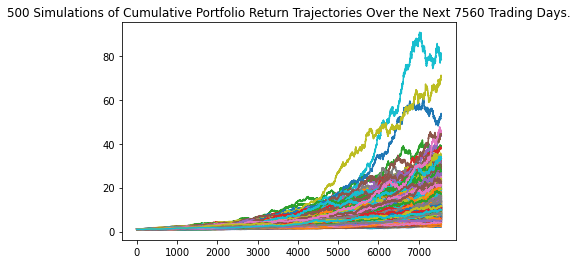

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_year_sim.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

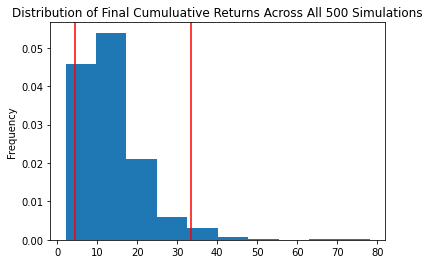

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_year_sim.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_year_sim_stat = thirty_year_sim.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
thirty_year_sim_stat

count           500.000000
mean             13.737637
std               8.413088
min               2.089120
25%               8.276833
50%              11.292571
75%              16.732891
max              78.136046
95% CI Lower      4.425269
95% CI Upper     33.469543
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the Stocks/Bonds Portfolio is ${total_stocks_bonds:.2f}")

The current balance of the Stocks/Bonds Portfolio is $70196.10


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_year_sim_stat[8]*total_portfolio,2)
ci_upper_thirty_cumulative_return = round(thirty_year_sim_stat[9]*total_portfolio,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the retirement portfolio"
      f" over the next {num_years} years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $131100.82 in the retirement portfolio over the next 30 years will end within in the range of $580156.44 and $4387884.63.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 60% to SPY and 40% to AGG.
# Run 500 samples.
num_sims_10 = 500
num_years_10 = 10

ten_year_sim = MCSimulation(
    portfolio_data = financial_planner_df,
    weights=[0.60, 0.40],
    num_simulation = num_sims_10,
    num_trading_days = 252 * num_years_10
)

# Review the simulation input data
ten_year_sim.portfolio_data.head()

AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-25 00:00:00-05:00  106.64  106.700  106.560  106.6750   3157633.0   
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   

                                           SPY                              \
                          daily_return    open    high       low     close   
time                                                                         
2019-01-25 00:00:00-05:00          NaN  265.61  266.70  263.6595  265.7000   
2019-01-28 00:00:00-05:00    -0.000187  263.39  263.82  261.7900  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.4800  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.2500  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.2700  270.2325   

                                                  
                             volume daily_return  
time                                              
2019-01-25 00:00:00-05:00  78094541          NaN  
2019-01-28 00:00:00-05:00  75207990    -0.007772  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Jose\Dropbox\berkeley\5th_challenge_files\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015418,1.012638,0.999797,1.004721,1.016405,0.997933,0.995712,0.996005,0.993575,1.004774,...,1.001237,0.993615,1.000861,0.992783,1.000074,1.001379,0.998892,0.998323,1.004143,0.997720
2,1.021552,1.011679,0.999889,1.007249,1.012427,0.995605,0.991780,0.987317,0.999793,1.004085,...,1.004695,0.988880,1.014662,1.006243,0.996161,0.998596,1.006702,0.998707,1.008401,1.006719
3,1.024440,1.007302,1.004691,1.003156,1.012500,0.993257,0.987534,0.982019,1.007100,0.996836,...,0.996551,0.990350,1.017943,1.000992,0.995429,0.998886,0.994840,1.003056,1.013434,1.017950
4,1.026641,1.000801,0.999826,1.005964,0.997616,0.984924,0.992585,0.993882,1.003364,0.996827,...,0.998021,0.991365,1.009587,1.012064,0.991909,0.997855,0.990822,1.004691,1.010176,1.013557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.550016,3.102585,2.219769,1.552586,1.915998,2.154150,2.063370,2.549743,1.845981,2.266717,...,1.809088,1.344678,1.300917,4.137099,2.123365,2.064928,1.492428,1.135518,2.894141,3.979088
2517,2.549704,3.108945,2.228954,1.548165,1.904698,2.160217,2.042714,2.547658,1.842027,2.270660,...,1.816494,1.347019,1.295058,4.101453,2.116907,2.080878,1.504820,1.140016,2.878499,4.007764
2518,2.551623,3.067015,2.230884,1.556943,1.911401,2.153121,2.051394,2.550621,1.835331,2.248615,...,1.811406,1.351241,1.290241,4.117892,2.095545,2.069926,1.505939,1.153284,2.888983,4.041835
2519,2.557270,3.077305,2.239713,1.544469,1.919768,2.146710,2.069595,2.527692,1.833748,2.254260,...,1.821863,1.353312,1.295323,4.100499,2.120592,2.098634,1.498912,1.153586,2.895662,4.048184


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

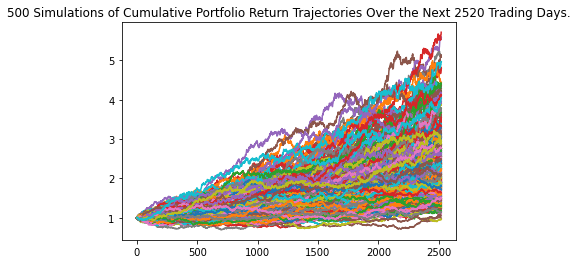

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

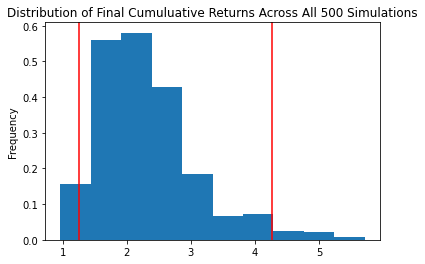

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_year_sim.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_sim_stat = ten_year_sim.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
ten_year_sim_stat

count           500.000000
mean              2.325232
std               0.774991
min               0.960032
25%               1.816106
50%               2.156651
75%               2.704439
max               5.715788
95% CI Lower      1.257884
95% CI Upper      4.266218
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the Stocks/Bonds Portfolio is ${total_stocks_bonds:.2f}")


The current balance of the Stocks/Bonds Portfolio is $70196.10


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_sim_stat[8]*total_portfolio,2)
ci_upper_ten_cumulative_return = round(ten_year_sim_stat[9]*total_portfolio,2)


# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the retirement portfolio"
      f" over the next {num_years_10} years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an initial investment of $131100.82 in the retirement portfolio over the next 10 years will end within in the range of $164909.63 and $559304.66.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

No it doesn't. The std dev is much lower in the 10yrs simulation with the .80 weight towards stocks when compared to the 30yr simulation.

I also ran a 10 yr simulation with a .6 weight on AGG and obtained a std dev of  1.536025 which yielded a 95% chance of a higher range of returns between $175034.91 and $944778.82.  This tells me that shifting the weight towards stocks does not allow members to retire after 10yrs but shifting them towards bonds may produce the desired results.

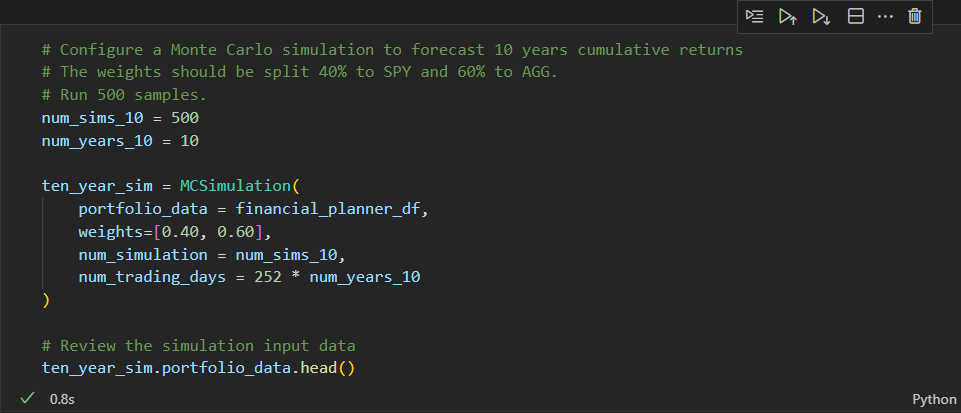

In [44]:
from IPython import display
display.Image('./Images/60_weight_agg_1.png')
# Code using .4 SPY and .6 AGG split

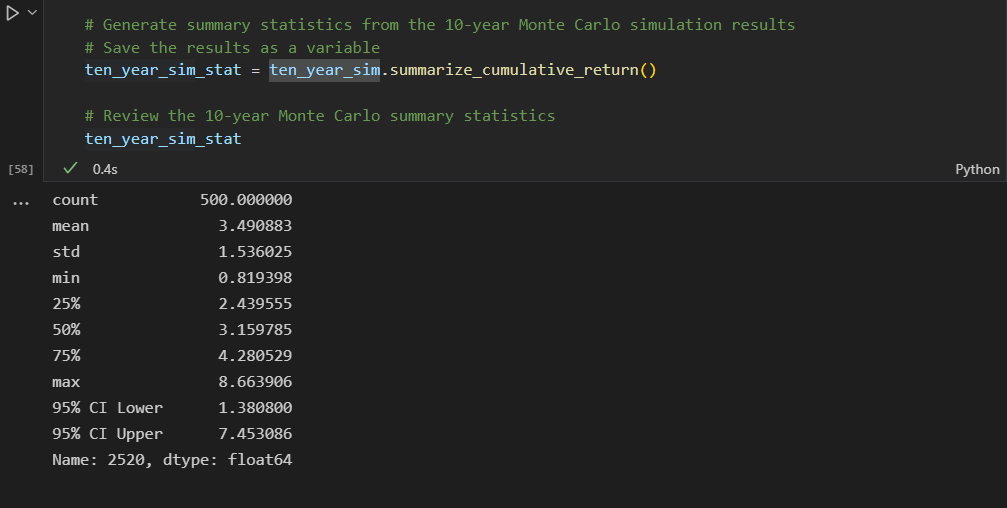

In [45]:
display.Image('./Images/60_weight_agg_2.png')
# Code showing a higher std dev with .6 weight on AGG

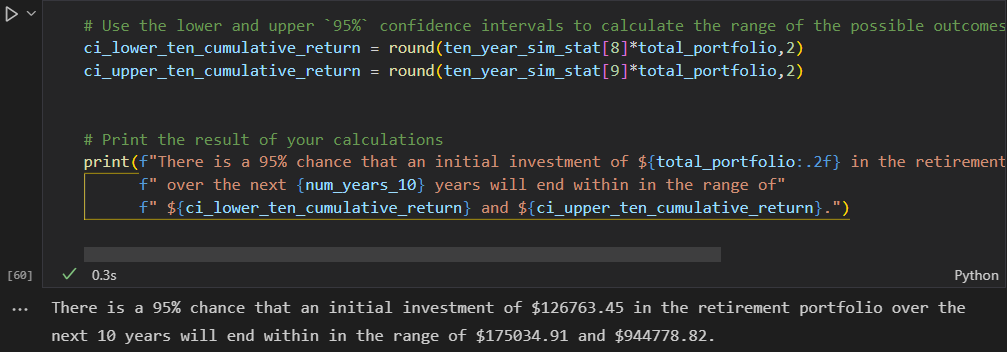

In [46]:
display.Image('./Images/60_weight_agg_3.png')
# code showing results of higher std dev with higher weight on bonds